# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2024

Мягий дедлайн: 23:59 11.12.2024

Жестокий дедлайн: 23:59 13.12.2024

### О задании

Задание состоит из трёх разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево для классификации и сравните его со стандартное имплементацией из sklearn.
3. В третьем разделе вы сделаете решающее дерево для регрессии, в листьях которого линейные модели.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест [ждем контеста] нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ в общем, не делал только бонус на plotly, не знаю точно макс. балл (лень считать)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

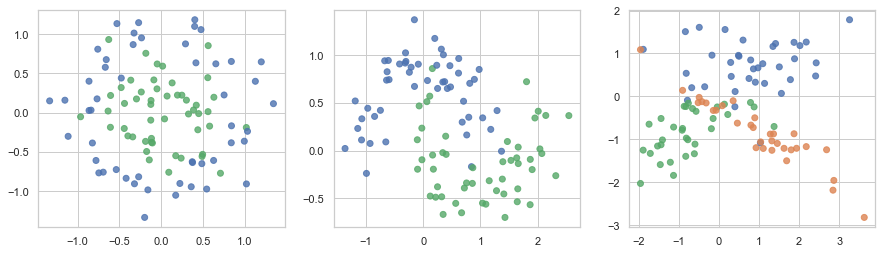

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

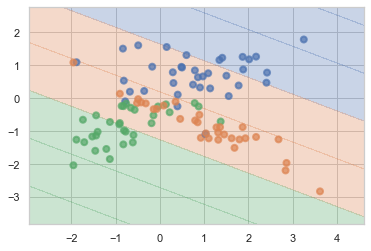

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

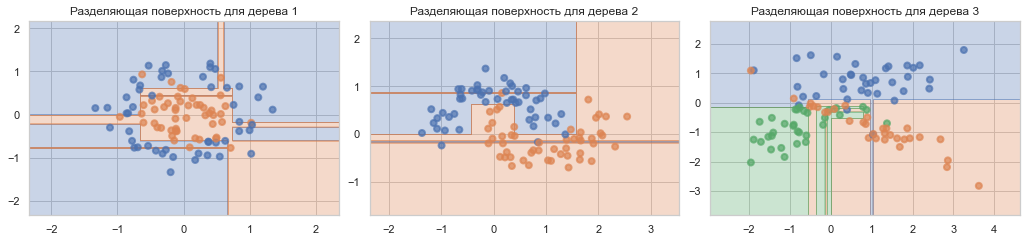

In [8]:
acc_train = []
acc_test = []
plt.figure(figsize=(15, 4))
for i in range(3):
    X, y = datasets[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)
    tree = DecisionTreeClassifier(random_state = 52)
    tree.fit(X_train, y_train)
    
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    acc_train.append(accuracy_score(y_train, pred_train))
    acc_test.append(accuracy_score(y_test, pred_test))
    
    plt.subplot(1, 3, i + 1)
    plt.title(f'Разделяющая поверхность для дерева {i + 1}')
    plot_surface(tree, X, y)


In [9]:
for i in range(3):
    print(f'Accuracy на трейне (модель {i + 1}): {acc_train[i]}')
    print(f'Accuracy на тесте (модель {i + 1}): {acc_test[i]}')
    print('\n')

Accuracy на трейне (модель 1): 1.0
Accuracy на тесте (модель 1): 0.76


Accuracy на трейне (модель 2): 1.0
Accuracy на тесте (модель 2): 0.84


Accuracy на трейне (модель 3): 1.0
Accuracy на тесте (модель 3): 0.64




__Ответ:__ Все деревья показывают accuracy 1 на трейне, но сильно хуже работают на тесте, очевидно здесь есть сильное переобучение. Разве что вторая модель работает еще более-менее неплохо, есть лишь небольшие подстройки под отдельные объекты.

__Задание 2. (1.25 баллов)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Бонус (0.75 баллов)__

Вместо того, чтобы рисовать  кучу графиков, сделайте интерактивную визуализацию разделяющей гиперплоскости с помощью библиотеки `plotly` (конкретнее, вам пригодится `plotly.graph_objects`): у вас должен получиться виджет с ползунком, по которому можно выбрать параметры `max_depth` и `min_samples_leaf` и посмотреть, как в зависимости от них меняется разделяющая поверхность и прогнозы модели. Если всё сделать аккуратно, получится очень красиво. Помните, что при загрузке в anytask виджеты могут много весить и надо подождать. Если ваш ноутбук не загружается -- попробуйте загрузить сначала с очищенным выводом этой ячейки. 

Заранее предупреждаем, что бонус сложный. Полезно будет ознакомиться:
 - https://plotly.com/python/sliders/
 - https://plotly.com/python/dropdowns/
 - https://plotly.com/python/knn-classification/

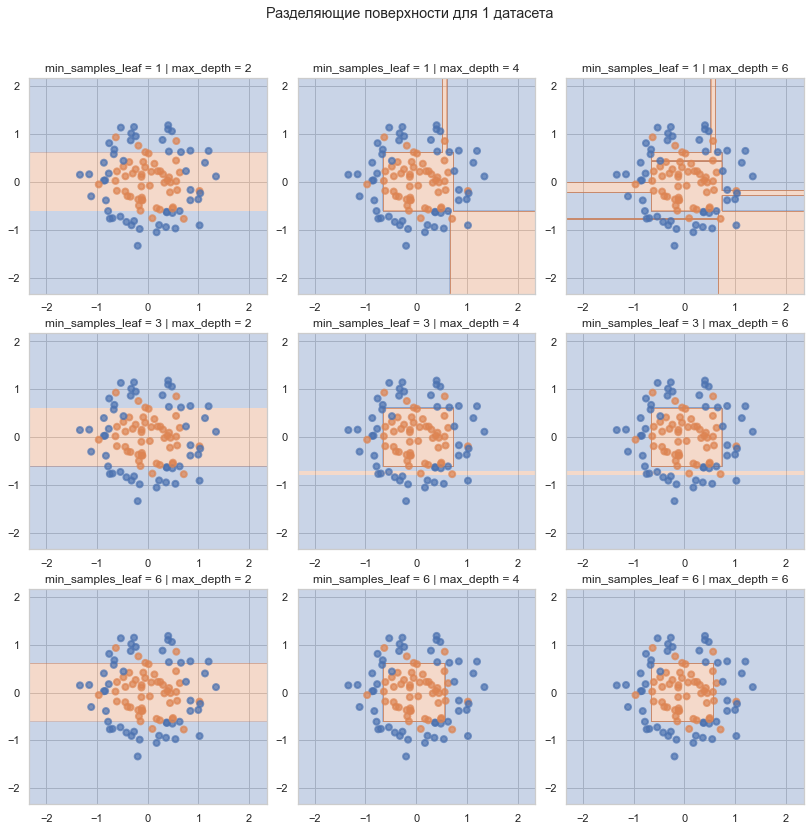

In [10]:
# немного подсмотрел как это делалось в семинаре
min_samples_leaf = [1, 3, 6]
max_depth = [2, 4, 6]
accuracy_train_0 = []
accuracy_test_0 = []

plt.figure(figsize = (12, 12))
plt.suptitle('Разделяющие поверхности для 1 датасета')
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

for i in range(3):
    for j in range(3):
        tree = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf[i], max_depth = max_depth[j],
                                     random_state = 52)
        tree.fit(X_train, y_train)
        pred_train = tree.predict(X_train)
        pred_test = tree.predict(X_test)
        accuracy_train_0.append(accuracy_score(y_train, pred_train))
        accuracy_test_0.append(accuracy_score(y_test, pred_test))
    
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.title(f'min_samples_leaf = {min_samples_leaf[i]} | max_depth = {max_depth[j]}')
        plot_surface(tree, X, y)
    

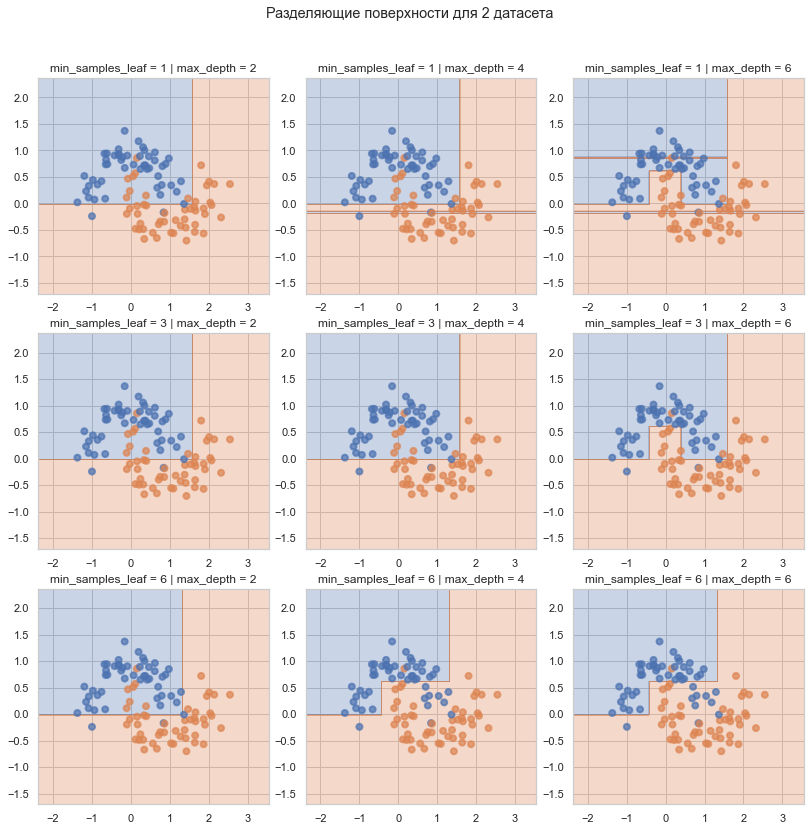

In [11]:
# немного подсмотрел как это делалось в семинаре
min_samples_leaf = [1, 3, 6]
max_depth = [2, 4, 6]
accuracy_train_1 = []
accuracy_test_1 = []

plt.figure(figsize = (12, 12))
plt.suptitle('Разделяющие поверхности для 2 датасета')
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

for i in range(3):
    for j in range(3):
        tree = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf[i], max_depth = max_depth[j],
                                     random_state = 52)
        tree.fit(X_train, y_train)
        pred_train = tree.predict(X_train)
        pred_test = tree.predict(X_test)
        accuracy_train_1.append(accuracy_score(y_train, pred_train))
        accuracy_test_1.append(accuracy_score(y_test, pred_test))
    
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.title(f'min_samples_leaf = {min_samples_leaf[i]} | max_depth = {max_depth[j]}')
        plot_surface(tree, X, y)

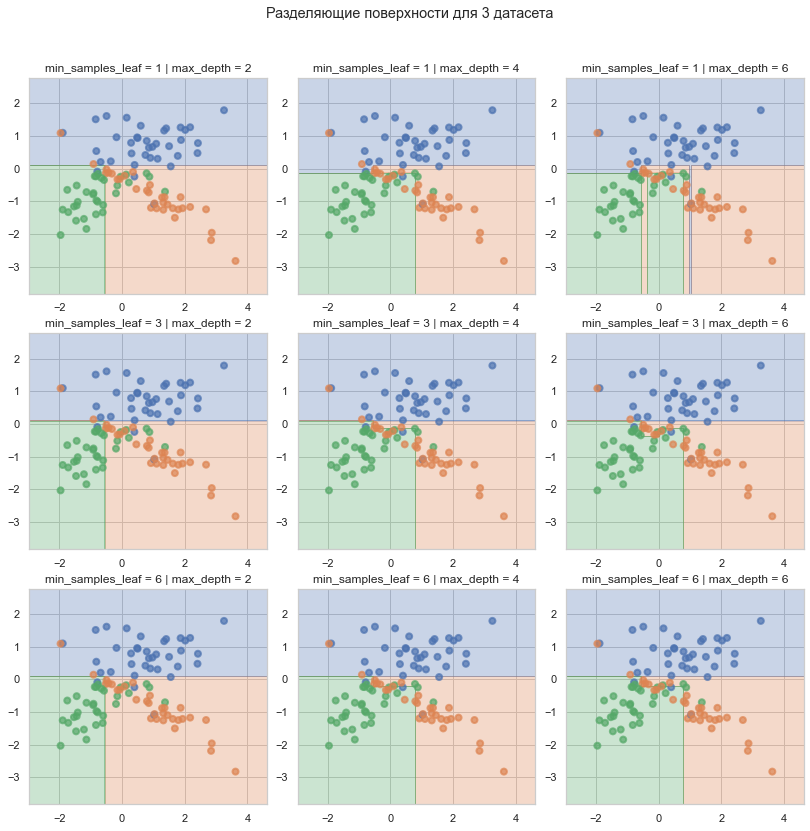

In [12]:
# немного подсмотрел как это делалось в семинаре
min_samples_leaf = [1, 3, 6]
max_depth = [2, 4, 6]
accuracy_train_2 = []
accuracy_test_2 = []

plt.figure(figsize = (12, 12))
plt.suptitle('Разделяющие поверхности для 3 датасета')
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

for i in range(3):
    for j in range(3):
        tree = DecisionTreeClassifier(min_samples_leaf = min_samples_leaf[i], max_depth = max_depth[j],
                                     random_state = 52)
        tree.fit(X_train, y_train)
        pred_train = tree.predict(X_train)
        pred_test = tree.predict(X_test)
        accuracy_train_2.append(accuracy_score(y_train, pred_train))
        accuracy_test_2.append(accuracy_score(y_test, pred_test))
    
        plt.subplot(3, 3, i * 3 + j + 1)
        plt.title(f'min_samples_leaf = {min_samples_leaf[i]} | max_depth = {max_depth[j]}')
        plot_surface(tree, X, y)

In [13]:
accuracy_max = [max(accuracy_test_0), max(accuracy_test_1), max(accuracy_test_2)]
for i in range(3):
    print(f'Максимальное качество на тесте для датасета {i+1}: {accuracy_max[i]}')

Максимальное качество на тесте для датасета 1: 0.88
Максимальное качество на тесте для датасета 2: 0.92
Максимальное качество на тесте для датасета 3: 0.76


__Ответ:__ В целом можно заметить такую закономерность, что лучшие картинки получаются для максимальной глубины 4-6 и минимального числа объектов в листьях 3-6. Естественно, конкретные лучшие значения для каждого датасета будут разные из-за специфики данных. Также можно заметить улучшение качества на тесте для всех датасетов. В целом кажется, что можно пытаться ставить значения глубины и мин. числа объектов повыше, так как глубина позволит деревьям хорошо подстраиваться под данные, а min_samples_leaf не даст им переобучиться.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

в коде немного использовал GPT. Промпт был такой: "как реализовать функцию find_best_split для decision tree не используя циклы?". Но на самом деле я оттуда взял лишь функцию np.cumsum, так как не знал про нее, остальное уже было легко допилить самому, естественно тупо скопировать код не получилось бы.

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [15]:
df = pd.read_csv('students.csv')
df.head(3)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0


''

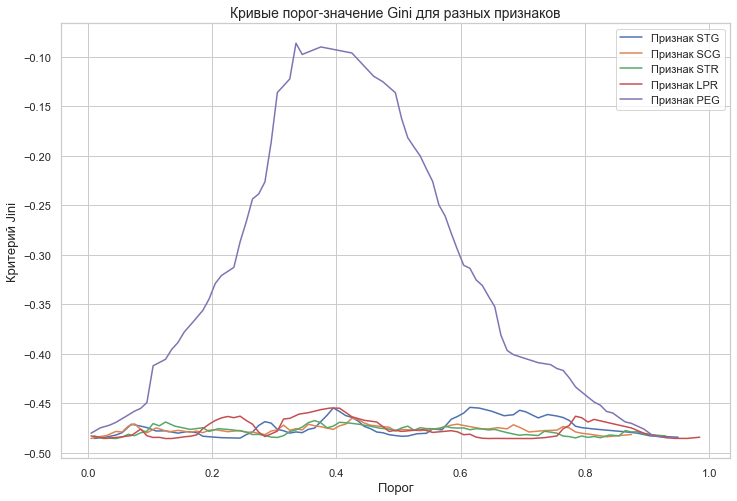

In [16]:
from hw5code import find_best_split
plt.figure(figsize = (12, 8))
plt.title('Кривые порог-значение Gini для разных признаков', fontsize = 14)
plt.xlabel('Порог', fontsize = 13)
plt.ylabel('Критерий Jini', fontsize = 13)

columns = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
for el in columns:
    thresholds, jinis, _, _ = find_best_split(df[el].values, df['UNS'].values)
    plt.plot(thresholds, jinis, label = f'Признак {el}')
plt.legend()
;

''

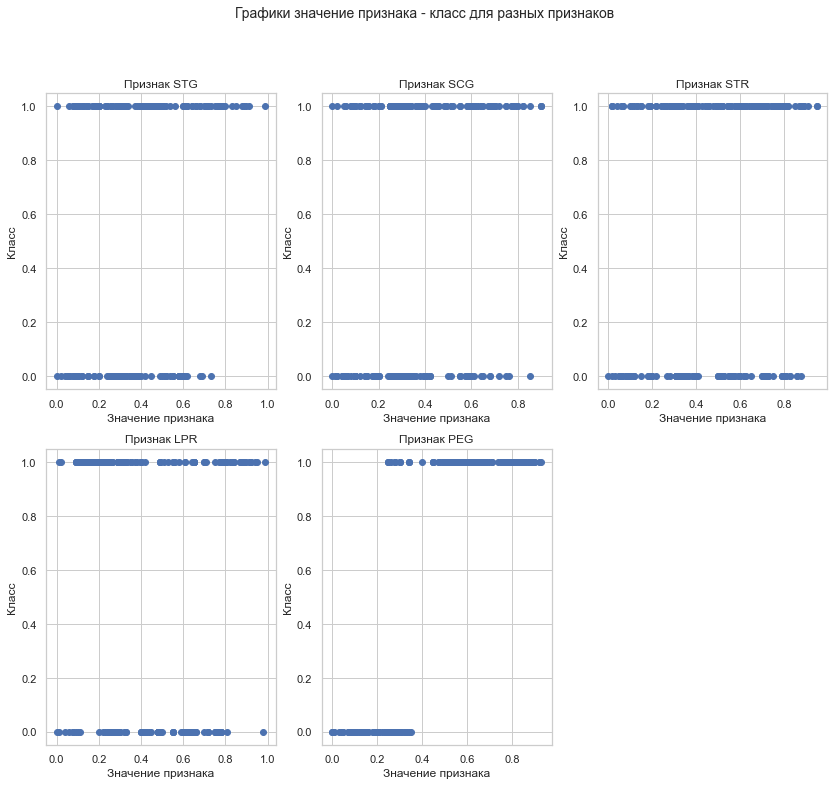

In [17]:
plt.figure(figsize = (14, 12))
plt.suptitle('Графики значение признака - класс для разных признаков', fontsize = 14)

for i in range(len(columns)):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[columns[i]], df['UNS'])
    plt.title(f'Признак {columns[i]}')
    plt.xlabel('Значение признака')
    plt.ylabel('Класс')
;

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

На графике значений критерия Джини в зависимости от порога очень сильно выделяется признак PEG. Он показывает самые максимальные значения критерия, сильно оторвавшись от всех остальных. 

Это также согласуется с графиком "значение признака - класс" для этого признака. Можно заметить, что признак можно практически идеально разделить прямой линией, в то время как для остальных признаков значения таргета идут вперемешку.

Вид кривой для "хороших признаков" скорее всего будет примерно такой же, который мы получили выше: Критерий Джини будет постепенно возрастать пока не дойдет до порога, при котором выборка поделится почти идеально, достигнет там максимума, а дальше будет убывать.

Что касается кривых для признаков, по которым деление почти невозможно, то там скорее всего значение критерия Джини будет держаться примерно на одном и том же низком уровне, независимо от порога, в принципе примерно такую картину мы и видели для остальных признаков.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

GPT немного помог с написанием predict_node. Промптом было условие + код, который надо дополнить. Просто я не мог понять, что для кат. признаков нужно проверять не x[split] < threshold, а x[split] in features

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [22]:
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree

In [23]:
df = pd.read_csv('agaricus-lepiota.data')
df['p'] = (df['p'] == 'e') * 1
df.head(3)

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [24]:
X = df.drop(columns = 'p')
y = df['p']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=777)

for el in X_train.columns:
    encoder = LabelEncoder()
    X_train[el] = encoder.fit_transform(X_train[el])
    X_test[el] = encoder.transform(X_test[el])

In [26]:
from hw5code import DecisionTree
tree = DecisionTree(feature_types = ['categorical'] * len(X_train.columns))
tree.fit(X_train.to_numpy(), y_train.to_numpy())
pred = tree.predict(X_test.to_numpy())
print(f'Accuracy score: {(pred == y_test).mean()}')

Accuracy score: 0.9980305268340719


__Задание 8. (1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe.

Подсмотрел у GPT np.argmax(np.bincount(sub_y)), чтобы в одну строчку красиво найти самый популярный класс. В качестве промпта ввел свой код и написал: как добавить реализацию max_depth в код. Естественно, он выдал много мусора, но вот эта функция например оказалась полезной

In [52]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
from hw5code import DecisionTree

In [38]:
df = pd.read_csv('tic-tac-toe-endgame.csv')
df['V10'] = (df['V10'] == 'positive') * 1
df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,1
1,x,x,x,x,o,o,o,x,o,1
2,x,x,x,x,o,o,o,o,x,1


In [39]:
X = df.drop(columns = 'V10')
y = df['V10']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=777)

for el in X_train.columns:
    encoder = LabelEncoder()
    X_train[el] = encoder.fit_transform(X_train[el])
    X_test[el] = encoder.transform(X_test[el])

''

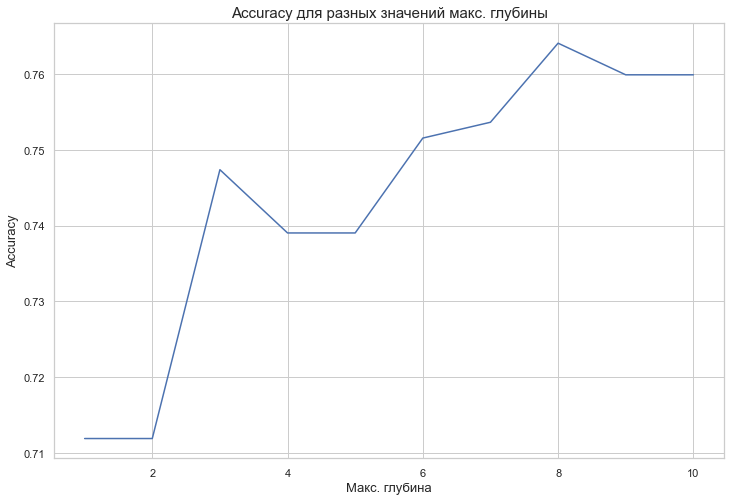

In [47]:
grid_depth = np.arange(1, 11)
accuracy_depth = []
for depth in grid_depth:
    tree = DecisionTree(feature_types=['categorical'] * len(X_train.columns), max_depth = depth)
    tree.fit(X_train.to_numpy(), y_train.to_numpy())
    pred = tree.predict(X_test.to_numpy())
    acc = (pred == y_test).mean()
    accuracy_depth.append(acc)

plt.figure(figsize = (12, 8))
plt.plot(grid_depth, accuracy_depth)
plt.title('Accuracy для разных значений макс. глубины', fontsize = 15)
plt.xlabel('Макс. глубина', fontsize = 13)
plt.ylabel('Accuracy', fontsize = 13)
;

''

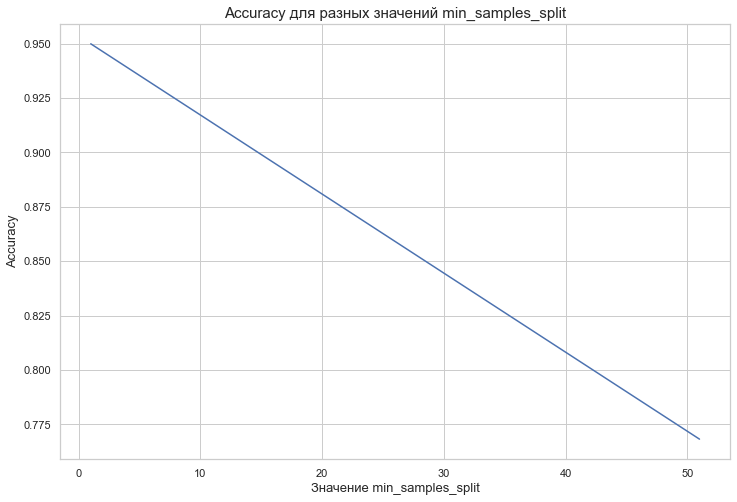

In [55]:
grid_split = np.arange(1, 100, 50)
accuracy_split = []
for split in grid_split:
    tree = DecisionTree(feature_types=['categorical'] * len(X_train.columns), min_samples_split = split)
    tree.fit(X_train.to_numpy(), y_train.to_numpy())
    pred = tree.predict(X_test.to_numpy())
    acc = (pred == y_test).mean()
    accuracy_split.append(acc)

plt.figure(figsize = (12, 8))
plt.plot(grid_split, accuracy_split)
plt.title('Accuracy для разных значений min_samples_split', fontsize = 15)
plt.xlabel('Значение min_samples_split', fontsize = 13)
plt.ylabel('Accuracy', fontsize = 13)
;

''

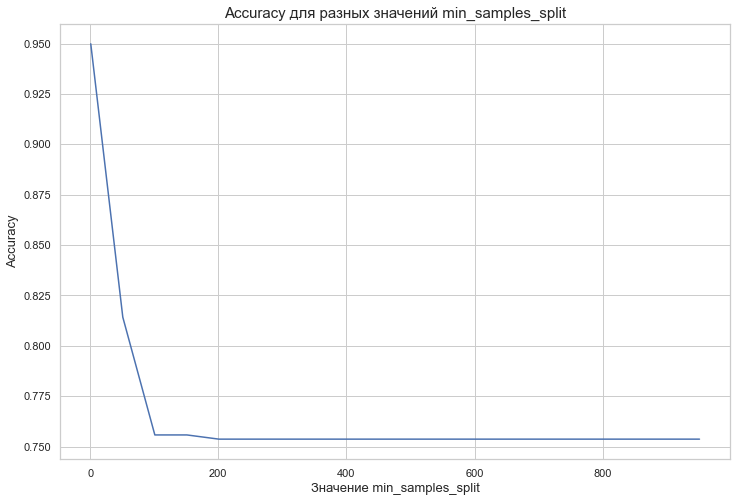

In [50]:
grid_leaf = np.arange(1, 1000, 50)
accuracy_leaf = []
for leaf in grid_leaf:
    tree = DecisionTree(feature_types=['categorical'] * len(X_train.columns), min_samples_leaf = leaf)
    tree.fit(X_train.to_numpy(), y_train.to_numpy())
    pred = tree.predict(X_test.to_numpy())
    acc = (pred == y_test).mean()
    accuracy_leaf.append(acc)

plt.figure(figsize = (12, 8))
plt.plot(grid_leaf, accuracy_leaf)
plt.title('Accuracy для разных значений min_samples_split', fontsize = 15)
plt.xlabel('Значение min_samples_split', fontsize = 13)
plt.ylabel('Accuracy', fontsize = 13)
;

Можно заметить, что min_samples_leaf и min_samples_split в целом только вредят обучению, а вот значение max_depth может довольно неплохо поднять качество

__Задание 9. (до 3-х баллов)__

Реализуйте класс `LinearRegressionTree`:

 - Если вам удобно, можете сделать его наследуемым от `DecisionTree` и переопределить только необходимые методы. Можете добавить новые — как вам нравится.
 - В листьях находятся не константные предсказания, а линейные модели (можно использовать из библиотеки `sklearn`).
 - Ваша реализация должна решать задачу __регрессии__, поэтому для поиска оптимального разбиения нужно написать новую функцию.
 - **Максимум 1.8 балла, если**:
   - В качестве критерия для разбиения считаете среднее квадратное/абсолютное отклонение
   - Итерируетесь по всем порогам
   - Ваша реализация строится как обычное решающее дерево для регрессии, но в листьях линейные модели.
   - Есть поддержка параметра max_depth
 - **Максимум три балла, если выполнено следующее**:
     - Для разбиения перебираются не все пороги. Пороги выбираются из значений признаков, разбитых на квантили.
     - Для разбиении выбирается порог, который минимизирует суммарную ошибку линейных моделей после разбиения: $$\text{loss} = \frac{n_{left}}{n} \cdot \text{loss}_{left} + \frac{n_{right}}{n} \cdot \text{loss}_{right}$$ (Разумеется, для оценки этих ошибок вам надо будет строить много линейных моделей, это не дисперсии. В качестве функционала ошибки возьмите MAE или MSE)
     - Есть поддержка параметров max_depth, min_samples_split, min_samples_leaf

__Задание 10. (1 балл)__

Проведите эксперименты с реализованным вами линейным деревом на любом подходящем датасете из sklearn (https://scikit-learn.org/1.5/datasets/real_world.html), который вам нравится. Подберите лучшие гиперпараметры (max_depth и остальные, если вы их реализовывали). Сравните ваше дерево со стандартным деревом для регрессии из sklearn, для него тоже подберите гиперпараметры.

In [72]:
from tqdm import tqdm
from hw5code import LinearRegressionTree
from sklearn.tree import DecisionTreeRegressor

In [61]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=777)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state=777)

Сначала перебираем параметры для нашего крутого дерева:

In [69]:
grid_depth = [1, 2, 3, 4, 5]
grid_leaf = np.arange(500, 1600, 100)
grid_split = np.arange(1000, 2100, 100)

best_mae = 10**6
best_depth = None
best_leaf = None
best_split = None

for depth in tqdm(grid_depth):
    for leaf in grid_leaf:
        for split in grid_split:
            model = LinearRegressionTree(feature_types=['real']*X_train.shape[1], 
                                    max_depth=depth, min_samples_leaf = leaf, min_samples_split = split)
            model.fit(X_train, y_train)
            pred = model.predict(X_val).reshape(-1)
            mae = np.mean(np.abs(pred - y_val))
            if mae < best_mae:
                best_mae = mae
                best_depth = depth
                best_leaf = leaf
                best_split = split

100%|█████████████████████████████████████████████| 5/5 [02:08<00:00, 25.78s/it]


In [75]:
model = LinearRegressionTree(feature_types=['real']*X_train.shape[1], 
            max_depth=best_depth, min_samples_leaf = best_leaf, min_samples_split = best_split)
model.fit(X_train, y_train)
pred = model.predict(X_test).reshape(-1)
mae = np.mean(np.abs(pred - y_test))

Теперь для жалкого дерева из sklearn

In [73]:
best_mae_tree = 10**6
best_depth_tree = None
best_leaf_tree = None
best_split_tree = None

grid_depth_tree = [3, 4, 5, 6, 7, 8, 9, 10]
grid_leaf_tree = np.arange(500, 1600, 100)
grid_split_tree = np.arange(1000, 2100, 100)

for depth in tqdm(grid_depth_tree):
    for leaf in grid_leaf_tree:
        for split in grid_split_tree:
            model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf,
                                           min_samples_split=split, random_state=777)
            model.fit(X_train, y_train)
            pred = model.predict(X_val)
            mae_tree = np.mean(np.abs(pred - y_val))
            if mae_tree < best_mae_tree:
                best_mae_tree = mae_tree
                best_depth_tree = depth
                best_leaf_tree = leaf
                best_split_tree = split

100%|█████████████████████████████████████████████| 8/8 [00:22<00:00,  2.82s/it]


In [74]:
model = DecisionTreeRegressor(max_depth=best_depth_tree, min_samples_leaf = best_leaf_tree,
                               min_samples_split = best_split_tree, random_state=777)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mae_tree = np.mean(np.abs(pred - y_test))

In [77]:
print(f'MAE на тестовой выборке для регрессионного дерева: {mae}')
print(f'MAE на тестовой выборке для обычного дерева: {mae_tree}')

MAE на тестовой выборке для регрессионного дерева: 0.47335853987120585
MAE на тестовой выборке для обычного дерева: 0.5480309497342908


Урааа, мы построили дерево лучше тупого склерновского :)

Посмотрите, что будет, если обучить ваше дерево на данных, которые сгенерированы внизу. Нарисуйте график с предсказаниями и таргетами на всей выборке, сравните с обычным деревом.

Напишите, какие достоинства и недостатки вы видите у реализованного вами линейного дерева.

In [79]:
n_samples = 3_000
x = np.linspace(0, 5, n_samples).reshape(-1, 1)
y = np.sin(x.flatten()) + np.random.normal(0, 0.1, n_samples) * np.random.normal(0, 1, n_samples)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95, random_state=0x4b524f4c2d562d53544f594c4f % (2 ** 32 - 1))

model_lr = LinearRegressionTree(feature_types=['real']*X_train.shape[1], max_depth=5)
model_lr.fit(x_train, y_train)
pred_lr = model_lr.predict(x).reshape(-1)

model_tree = DecisionTreeRegressor(random_state=777)
model_tree.fit(x_train, y_train)
pred_tree = model_tree.predict(x)

''

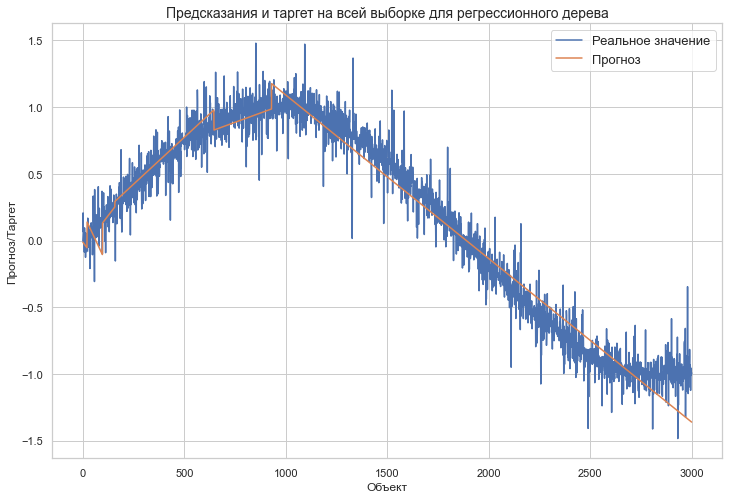

In [82]:
plt.figure(figsize = (12, 8))
plt.title('Предсказания и таргет на всей выборке для регрессионного дерева', fontsize = 14)
plt.xlabel('Объект')
plt.ylabel('Прогноз/Таргет')
plt.plot(y, label = 'Реальное значение')
plt.plot(pred_lr, label = 'Прогноз')
plt.legend(fontsize = 13)
;

''

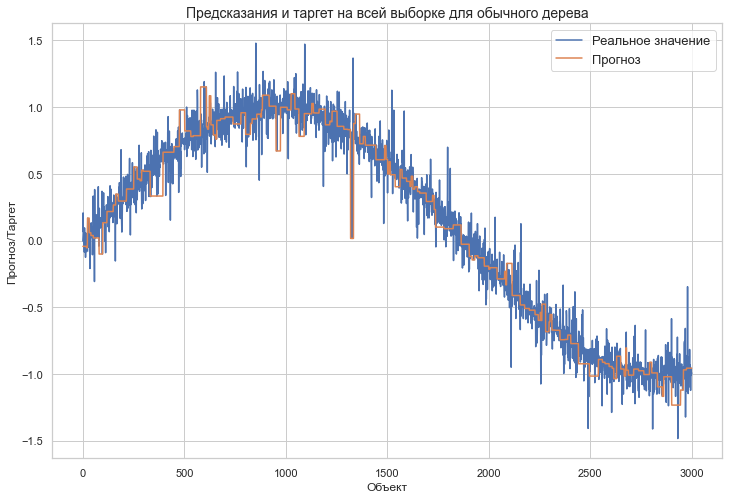

In [83]:
plt.figure(figsize = (12, 8))
plt.title('Предсказания и таргет на всей выборке для обычного дерева', fontsize = 14)
plt.xlabel('Объект')
plt.ylabel('Прогноз/Таргет')
plt.plot(y, label = 'Реальное значение')
plt.plot(pred_tree, label = 'Прогноз')
plt.legend(fontsize = 13)
;

**Ответ:** Как бы банально не звучало, но наше дерево ведет себя как-то более "линейно", обладает хорошей обобщающей способностью, меньше подстраивается под выборку. Это все плюсы, а что касается минусов, то стоит сказать, что модель меньше отражает специфику данных, эти колебания которые можно видеть на графике, и которые хорошо отражает обычное дерево из sklearn.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

<img src="https://user-images.githubusercontent.com/6876788/96633009-d1818000-1318-11eb-9f1d-7f914f4ccb16.gif" style="width: 400px">